Problem statement:
Build a recommender system by using cosine simillarties score.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
from google.colab import files
upload=files.upload()

Saving book.csv to book (3).csv


In [45]:
df=pd.read_csv('book.csv',encoding='latin-1')
df.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [46]:
df=df.drop(['Unnamed: 0'],axis=1)

In [47]:
df.shape

(10000, 3)

In [48]:
df.columns = ["UserID","BookTitle","BookRating"]

In [49]:
df.BookRating.value_counts()

8     2283
7     2076
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: BookRating, dtype: int64

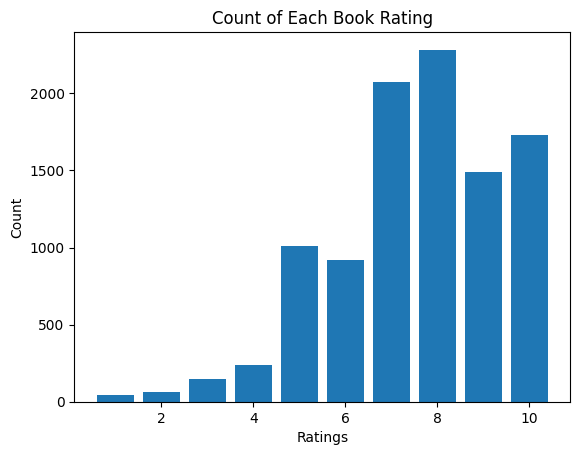

In [50]:
rating_counts = df['BookRating'].value_counts().sort_index()
plt.bar(rating_counts.index, rating_counts)
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('Count of Each Book Rating')
plt.show()

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      10000 non-null  int64 
 1   BookTitle   10000 non-null  object
 2   BookRating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In [52]:
df.isnull().sum()

UserID        0
BookTitle     0
BookRating    0
dtype: int64

In [54]:
df.sort_values("UserID")

,UserID,BookTitle,BookRating
2401,8,Wings,5
2400,8,The Western way: A practical guide to the West...,5
2399,8,Ancient Celtic Romances,5
2402,8,Truckers,5
2405,8,The Art Of Celtia,7
...,...,...,...
2395,278854,La crÃ³nica del PerÃº (CrÃ³nicas de AmÃ©rica),7
2398,278854,Celtic Mythology (Library of the World's Myths...,8
2393,278854,A corrente de Trewis Scott,7
2394,278854,As valkÃ­rias,7


In [55]:
#number of unique users in the dataset
len(df['UserID'].unique())

2182

In [56]:
#Unique movies
len(df['BookTitle'].unique())

9659

In [58]:
book_df = df.pivot_table(index='UserID', columns='BookTitle', values='BookRating').reset_index(drop=True)
book_df.fillna(0,inplace=True)
book_df

BookTitle,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
from sklearn.metrics import pairwise_distances
user_sim = 1 - pairwise_distances(book_df.values,metric='cosine')
user_sim.shape

(2182, 2182)

In [61]:
#Store the results in a dataframe
user_sim_df = pd.DataFrame(user_sim)

In [62]:
#Set the index and column names to user ids
user_sim_df.index = df.UserID.unique()
user_sim_df.columns = df.UserID.unique()

In [63]:
np.fill_diagonal(user_sim,0)
user_sim_df

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
user_sim_df.idxmax(axis=1)[2:9]

276736    276726
276737    276726
276744    276726
276745    276726
276747    276726
276748    161677
276751    276726
dtype: int64

The output indicates that users 276736, 276737, 276744, 276745, and 276747 have similar preferences to user 276726, while user 276748 is most similar to user 161677, and user 276751 is most similar to user 276726 in a collaborative filtering system.

In [80]:
print(df[(df['UserID']==276726) |(df['UserID']==276751) | (df['UserID']==276736)| (df['UserID']== 276737)| (df['UserID']==276744)| (df['UserID']==276745)| (df['UserID']==276747)| (df['UserID']==276748)| (df['UserID']==161677)])


      UserID                                          BookTitle  BookRating
0     276726                                Classical Mythology           5
3     276736  Flu: The Story of the Great Influenza Pandemic...           8
4     276737                             The Mummies of Urumchi           6
5     276744                             The Kitchen God's Wife           7
6     276745  What If?: The World's Foremost Military Histor...          10
7     276747                                    PLEADING GUILTY           9
8     276747  Under the Black Flag: The Romance and the Real...           9
9     276747            Where You'll Find Me: And Other Stories           8
10    276747                        Nights Below Station Street           7
11    276747  Hitler's Secret Bankers: The Myth of Swiss Neu...           7
12    276748                                 The Middle Stories           6
13    276751                                           Jane Doe           8
9190  161677